In [93]:
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import numpy as np

import seaborn as sns

import pandas as pd

In [56]:
df = pd.read_csv('sample.csv')
df = df[(df.para1 < 300)]

In [57]:
X_df = df[['para1', 'para2', 'para3', 'para4']]
y_df = df['price']

In [58]:
X, X_test, y, y_test = train_test_split(X_df.values, y_df.values)

In [59]:
scaler = StandardScaler()
linear_regerssor = LinearRegression()
sgd_regressor = SGDRegressor()

In [60]:
pipeline_linear = Pipeline([('scale', scaler), ('linear_regression', linear_regerssor)])

In [61]:
pipeline_linear.fit(X, y)

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [62]:
y_pred = pipeline_linear.predict(X)
y_pred_test = pipeline_linear.predict(X_test)

In [63]:
print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 113.956924481
R2 train: 0.553594630697

MAE test: 116.310227481
R2 test: 0.582924895153


In [64]:
df.price.describe()

count    9999.000000
mean      433.661422
std       277.357322
min        50.730000
25%       250.000000
50%       370.000000
75%       550.000000
max      5700.000000
Name: price, dtype: float64

In [65]:
pipeline_sgd = Pipeline([('scale', scaler), ('sgd_regression', sgd_regressor)])
pipeline_sgd.fit(X, y)

y_pred = pipeline_sgd.predict(X)
y_pred_test = pipeline_sgd.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 113.685598841
R2 train: 0.553091594384

MAE test: 116.269947975
R2 test: 0.581142064108


In [66]:
ada_regressor = AdaBoostRegressor()
pipeline_linear = Pipeline([('ada_regression', AdaBoostRegressor())])
pipeline_linear.fit(X, y)

y_pred = pipeline_linear.predict(X)
y_pred_test = pipeline_linear.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 148.061142382
R2 train: 0.500661137562

MAE test: 151.622960146
R2 test: 0.514435733071


In [84]:
X_df = df[['dow', 'para1', 'para2', 'para3', 'para4']]

X_df = pd.concat([pd.get_dummies(X_df.dow), X_df], axis=1).drop('dow', axis=1)
X, X_test, y, y_test = train_test_split(X_df.values, y_df.values)

In [85]:
pipeline_sgd = Pipeline([('scale', scaler), ('sgd_regression', sgd_regressor)])
pipeline_sgd.fit(X, y)

y_pred = pipeline_sgd.predict(X)
y_pred_test = pipeline_sgd.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 2284.08282485
R2 train: -15569.7303293

MAE test: 2583.17445615
R2 test: -22579.8645474


In [86]:
pipeline_linear = Pipeline([('scale', scaler), ('sgd_regression', sgd_regressor)])
pipeline_linear.fit(X, y)

y_pred = pipeline_linear.predict(X)
y_pred_test = pipeline_linear.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 1762.93208672
R2 train: -126667.618582

MAE test: 2568.52987055
R2 test: -184367.098487


In [87]:
ada_regressor = AdaBoostRegressor()
pipeline_linear = Pipeline([('ada_regression', AdaBoostRegressor())])
pipeline_linear.fit(X, y)

y_pred = pipeline_linear.predict(X)
y_pred_test = pipeline_linear.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 123.414860821
R2 train: 0.6169923384

MAE test: 126.542210964
R2 test: 0.594377565194


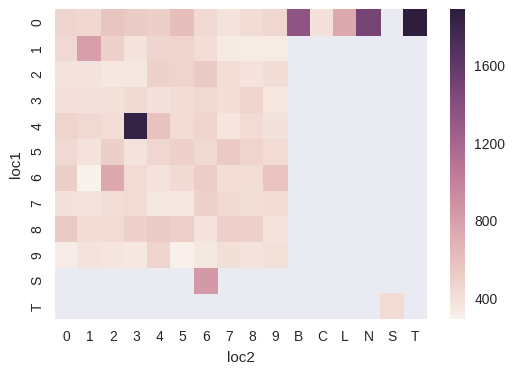

In [80]:
df.loc2 = df.loc2.str[1]
sns.heatmap(df.groupby(['loc1', 'loc2']).price.mean().unstack())

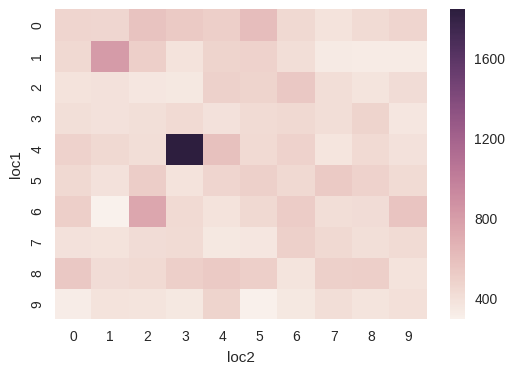

In [82]:
df_dropped_codes = df[df.loc1.isin(map(str, range(10))) & df.loc2.isin(map(str, range(10)))]
sns.heatmap(df_dropped_codes.groupby(['loc1', 'loc2']).price.mean().unstack())

In [83]:
len(df) - len(df_dropped_codes)

7

In [206]:
def bin_locs(df, bins=10):
    _df = df.copy()
    loc_codes = df_dropped_codes.groupby(['loc1', 'loc2']).price.mean().unstack()
    bin_thresholds = np.percentile(loc_codes, np.linspace(0, 100, bins))

    bin_thresholds = bin_thresholds.tolist()
    
    bin_thresholds.reverse()
    
    _df['loc_val'] = np.nan
    for upper_threshold in bin_thresholds:
        for i in range(10):
            for j in range(10):
                i = str(i)
                j = str(j)
                if loc_codes.loc[i][j] <= upper_threshold:
                    _df['loc_val'][(_df.loc1 == i) & (_df.loc2 == j)] = upper_threshold
    return _df

In [207]:
df_loc_val = bin_locs(df_dropped_codes)

/home/ryan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [208]:
X_df = df_loc_val[['loc_val', 'para1', 'para2', 'para3', 'para4']]
y_df = df_loc_val['price']
X, X_test, y, y_test = train_test_split(X_df.values, y_df.values)

In [209]:
pipeline_sgd = Pipeline([('scale', scaler), ('sgd_regression', sgd_regressor)])
pipeline_sgd.fit(X, y)

y_pred = pipeline_sgd.predict(X)
y_pred_test = pipeline_sgd.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 111.211093883
R2 train: 0.57307476418

MAE test: 118.846044244
R2 test: 0.526634870794


In [210]:
ada_regressor = AdaBoostRegressor()
pipeline_linear = Pipeline([('ada_regression', AdaBoostRegressor())])
pipeline_linear.fit(X, y)

y_pred = pipeline_linear.predict(X)
y_pred_test = pipeline_linear.predict(X_test)

print 'MAE train: ' + str(mean_absolute_error(y, y_pred))
print 'R2 train: ' + str(r2_score(y, y_pred)) + '\n'
print 'MAE test: ' + str(mean_absolute_error(y_test, y_pred_test))
print 'R2 test: ' + str(r2_score(y_test, y_pred_test))

MAE train: 162.019816607
R2 train: 0.421626150695

MAE test: 173.059624654
R2 test: 0.381393775235
